In [1]:
import pandas as pd
import numpy as np


In [3]:
Univ1 = pd.read_excel("/content/University_Clustering.xlsx")
Univ1


,Univ,State,Country,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,USA,1310,89,22,13,22704,94
1,CalTech,CA,USA,1415,100,25,6,63575,81
2,CMU,PA,USA,1260,62,59,9,25026,72
3,Columbia,NY,USA,1310,76,24,12,31510,88
4,Cornell,NY,USA,1280,83,33,13,21864,90
5,Dartmouth,NH,USA,1340,89,23,10,32162,95
6,Duke,NC,USA,1315,90,30,12,31585,95
7,Georgetown,DC,USA,1255,74,24,12,20126,92
8,Harvard,MA,USA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,USA,1305,75,44,7,58691,87


In [4]:
#EDA
Univ1.describe()



,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [7]:
Univ = Univ1.drop(["State","Country"], axis = 1)
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [8]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)



In [9]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:, 1:])
df_norm.describe()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from sklearn.cluster import	KMeans

In [11]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

In [12]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 20))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    


C:\Users\scs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\scs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\scs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\scs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

In [13]:
TWSS


[4.12345244239718,
 2.9674741004843965,
 2.2308047771916275,
 1.6781326840746351,
 1.4963462976080284,
 1.2861248939505896,
 1.051229310979934,
 0.89142699726236,
 0.6928143554292531,
 0.5399459160057575,
 0.4558954891182139,
 0.3549317015074797,
 0.28541899771970647,
 0.21956882488379253,
 0.1840513335813473,
 0.1363531085930762,
 0.09954096236544088,
 0.07141711401777791]

Text(0, 0.5, 'total_within_SS')

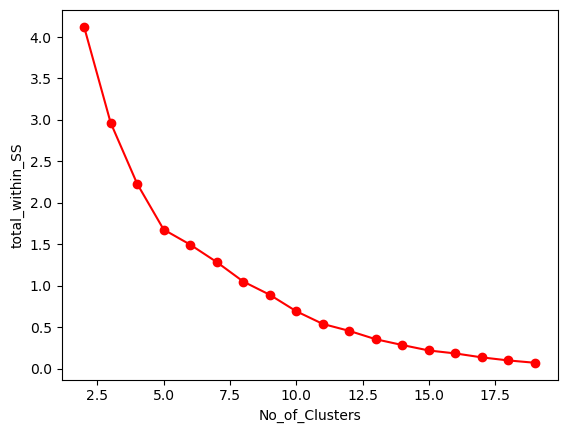

In [14]:
import matplotlib.pyplot as plt
# Scree plot 
plt.plot(k, TWSS, 'ro-');
plt.xlabel("No_of_Clusters");
plt.ylabel("total_within_SS")


In [15]:

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 5)
model.fit(df_norm)



C:\Users\scs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\scs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [16]:
model.labels_ # getting the labels of clusters assigned to each row 


array([0, 4, 3, 0, 0, 2, 2, 0, 2, 4, 2, 0, 0, 1, 2, 1, 2, 1, 3, 0, 3, 0,
       0, 1, 2])

In [ ]:
Univ.head()

In [17]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['Clust'] = mb # creating a  new column and assigning it to new column 


In [18]:

Univ.head()



,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clust
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [19]:
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ.head()



,Clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,4,CalTech,1415,100,25,6,63575,81
2,3,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [20]:
Univ.iloc[:, 2:].groupby(Univ.Clust).mean()



,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Clust,,,,,,
0,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
3,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
4,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


In [23]:
Univ.to_excel("Kmeans_university1.xlsx")



In [24]:
import os
os.getcwd()

'C:\\Users\\scs'